In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h2><b>Multi-Linear Regression Model</b><h2>

In [2]:
# Create a DataFrame with the Example data
data = {
    'Temperature': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    'Humidity': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
    'Wind Speed': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9],
    'Air Quality': [
        4.32, 5.07, 5.93, 6.24, 7.11, 7.78, 8.62, 9.12, 9.81, 10.33,
        11.05, 11.68, 12.45, 13.01, 13.44
    ]
}

df = pd.DataFrame(data)
df.head()

,Temperature,Humidity,Wind Speed,Air Quality
0,0.1,0.2,0.5,4.32
1,0.2,0.3,0.6,5.07
2,0.3,0.4,0.7,5.93
3,0.4,0.5,0.8,6.24
4,0.5,0.6,0.9,7.11


In [3]:
# Temperature, Humidity, Wind Speed (X) and Air Quality (Y)
X = df[['Temperature', 'Humidity', 'Wind Speed']]
Y = df['Air Quality']

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
# Create a Linear Regression model to fit and predict data.
model = LinearRegression()

In [6]:
# fit it to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
# Comaparing between Actual and Predicted Values
Y_pred = model.predict(X_test)
compareTable = pd.DataFrame({'Actual Values' : Y_test, 'Predicted Values' : Y_pred})
compareTable

,Actual Values,Predicted Values
9,10.33,10.382568
11,11.68,11.690186
0,4.32,4.510254
13,13.01,12.995850
5,7.78,7.774170


In [8]:
# Slope and InterCepts Values
print(f"Slope Values :", model.coef_)
print(f"Intercepts Values :", model.intercept_)

Slope Values : [ 9.95166545e+11 -4.95498672e+12  3.95982018e+12]
Intercepts Values : -1088429399278.7825


In [9]:
# Evaluate the model
print(f"MSE : {mean_squared_error(Y_test, Y_pred)}")
print(f"Round Sq : {r2_score(Y_test, Y_pred)}")

MSE : 0.00785958999633787
Round Sq : 0.9991730807110764


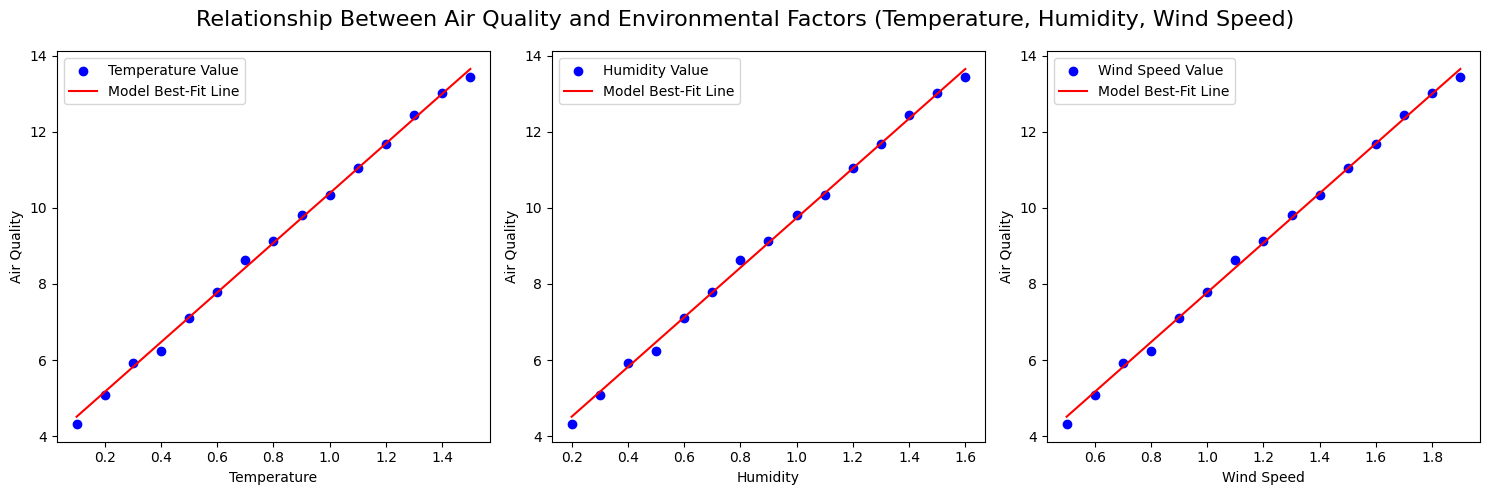

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Temperature vs Y
axs[0].scatter(X['Temperature'], Y, color='blue', label='Temperature Value')
axs[0].plot(X['Temperature'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Air Quality')
axs[0].legend()

# Plot Humidity vs Y
axs[1].scatter(X['Humidity'], Y, color='blue', label='Humidity Value')
axs[1].plot(X['Humidity'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Air Quality')
axs[1].legend()

# Plot Hotness vs Y
axs[2].scatter(X['Wind Speed'], Y, color='blue', label='Wind Speed Value')
axs[2].plot(X['Wind Speed'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[2].set_xlabel('Wind Speed')
axs[2].set_ylabel('Air Quality')
axs[2].legend()

fig.suptitle('Relationship Between Air Quality and Environmental Factors (Temperature, Humidity, Wind Speed)', fontsize=16)
plt.tight_layout()
plt.show()
